In [1]:
import oracles
import optimization

import numpy as np
import pandas
import math
from sklearn.datasets import load_svmlight_file

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Experiment 1

## a) Dependence on $\gamma$ and $\epsilon_{inner}$

In [2]:
dataX, dataY = load_svmlight_file('w8a')


x_0 = np.ones(dataX.shape[1]) / 2
u_0 = np.ones(dataX.shape[1])

gammas = [5, 10, 30, 50, 70, 100, 200]
histories = []
for gamma in gammas:
    (x_star, u_star), msg, history = optimization.barrier_method_lasso(dataX, dataY, 1, x_0, u_0,
                                                                       lasso_duality_gap=oracles.lasso_duality_gap,
                                                                       trace=True,
                                                                       gamma = gamma)
    histories.append(history)

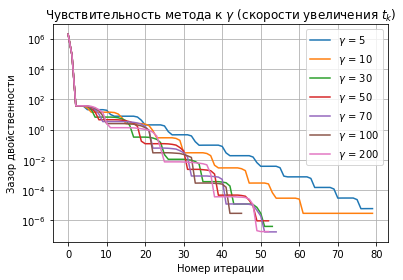

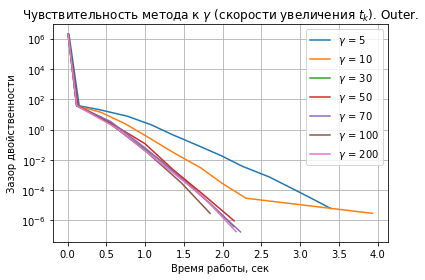

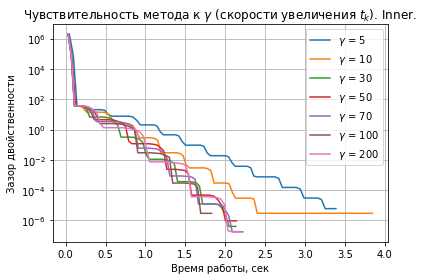

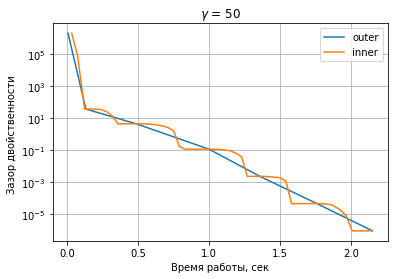

In [3]:
yscale('log')
title('Чувствительность метода к $\gamma$ (скорости увеличения $t_k$)')
xlabel('Номер итерации')
ylabel('Зазор двойственности')
grid(True)

for history, gamma in zip(histories, gammas):
    plot([i for i in range(0, len(history['duality_gap_inner']))], history['duality_gap_inner'], label='$\gamma$ = %s'%gamma) 
legend()
savefig("gamma_dependancy_iterations.png", dpi=100)
show()



yscale('log')
title('Чувствительность метода к $\gamma$ (скорости увеличения $t_k$). Outer.')
xlabel('Время работы, сек')
ylabel('Зазор двойственности')
grid(True)
for history, gamma in zip(histories, gammas):
    plot(history['time'], history['duality_gap'], label='$\gamma$ = %s'%gamma) 
legend()
savefig("gamma_dependancy_time_outer.png", dpi=100)
show()



yscale('log')
title('Чувствительность метода к $\gamma$ (скорости увеличения $t_k$). Inner.')
xlabel('Время работы, сек')
ylabel('Зазор двойственности')
grid(True)
for history, gamma in zip(histories, gammas):
    plot(history['time_inner'], history['duality_gap_inner'], label='$\gamma$ = %s'%gamma) 
legend()
savefig("gamma_dependancy_time_inner.png", dpi=100)
show()



yscale('log')
title('$\gamma$ = 50')
xlabel('Время работы, сек')
ylabel('Зазор двойственности ')
grid(True)
plot(histories[3]['time'], histories[3]['duality_gap'], label='outer') 
plot(histories[3]['time_inner'], histories[3]['duality_gap_inner'], label='inner') 
legend()
savefig("gamma_dependancy_gamma50.png", dpi=100)
show()

In [4]:
epses = [1e-1, 1e-3, 1e-5, 1e-7, 1e-9]
histories = []
for eps in epses:
    (x_star, u_star), msg, history = optimization.barrier_method_lasso(dataX, dataY, 1, x_0, u_0,
                                                                       lasso_duality_gap=oracles.lasso_duality_gap,
                                                                       trace=True,
                                                                       tolerance_inner = eps)
    histories.append(history)

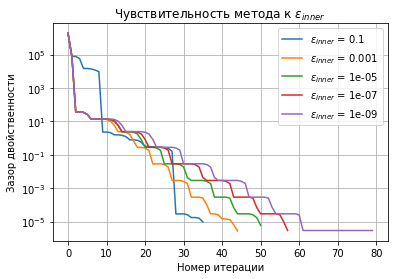

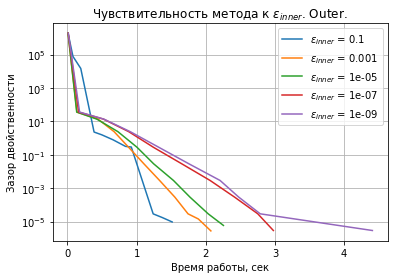

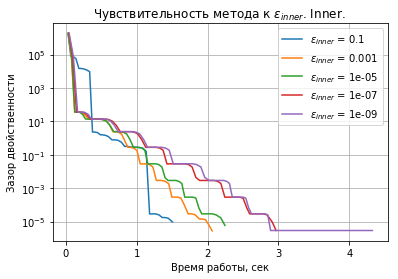

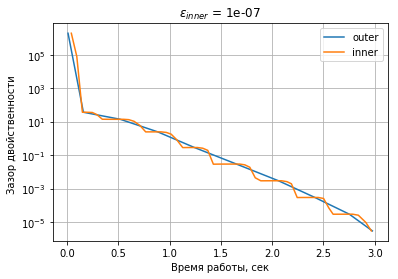

In [5]:
yscale('log')
title('Чувствительность метода к $\epsilon_{inner}$ ')
xlabel('Номер итерации')
ylabel('Зазор двойственности')
grid(True)

for history, eps in zip(histories, epses):
    plot([i for i in range(0, len(history['duality_gap_inner']))], history['duality_gap_inner'], \
         label='$\epsilon_{inner}$ = %s'%eps) 
legend()
savefig("eps_dependancy_iterations.png", dpi=100)
show()



yscale('log')
title('Чувствительность метода к $\epsilon_{inner}$. Outer.')
xlabel('Время работы, сек')
ylabel('Зазор двойственности')
grid(True)
for history, eps in zip(histories, epses):
    plot(history['time'], history['duality_gap'], label='$\epsilon_{inner}$ = %s'%eps) 
legend()
savefig("eps_dependancy_time_outer.png", dpi=100)
show()



yscale('log')
title('Чувствительность метода к $\epsilon_{inner}$. Inner. ')
xlabel('Время работы, сек')
ylabel('Зазор двойственности')
grid(True)
for history, eps in zip(histories, epses):
    plot(history['time_inner'], history['duality_gap_inner'], label='$\epsilon_{inner}$ = %s'%eps) 
legend()
savefig("eps_dependancy_time_inner.png", dpi=100)
show()



yscale('log')
title('$\epsilon_{inner}$ = %s'%epses[3])
xlabel('Время работы, сек')
ylabel('Зазор двойственности ')
grid(True)
plot(histories[3]['time'], histories[3]['duality_gap'], label='outer') 
plot(histories[3]['time_inner'], histories[3]['duality_gap_inner'], label='inner') 
legend()
savefig("eps_dependancy_eps.png", dpi=100)
show()

## b) Dependence on $n, \ m$ and $\lambda$

### n

In [6]:
np.random.seed(42)
ns = [10, 50, 100, 300, 500]
m = 200


histories = []
for n in ns:
    dataX_rand = np.random.rand(m, n)
    dataY_rand = np.random.rand(m)
    
    x_0_rand = np.ones(dataX_rand.shape[1]) / 2
    u_0_rand = np.ones(dataX_rand.shape[1])
    
    (x_star, u_star), msg, history = optimization.barrier_method_lasso(dataX_rand, dataY_rand, 1, x_0_rand, u_0_rand,
                                                                       lasso_duality_gap=oracles.lasso_duality_gap,
                                                                       trace=True)
    histories.append(history)

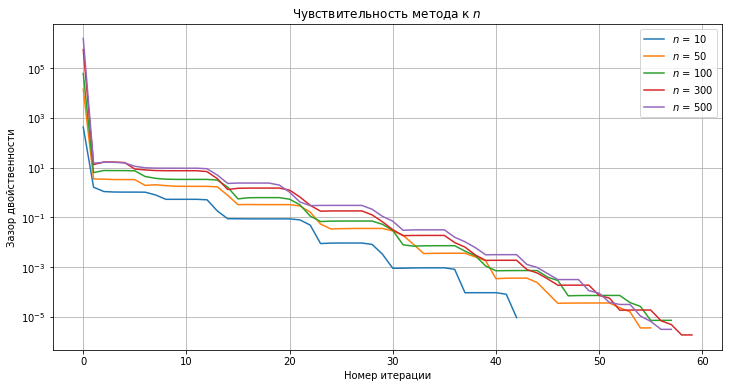

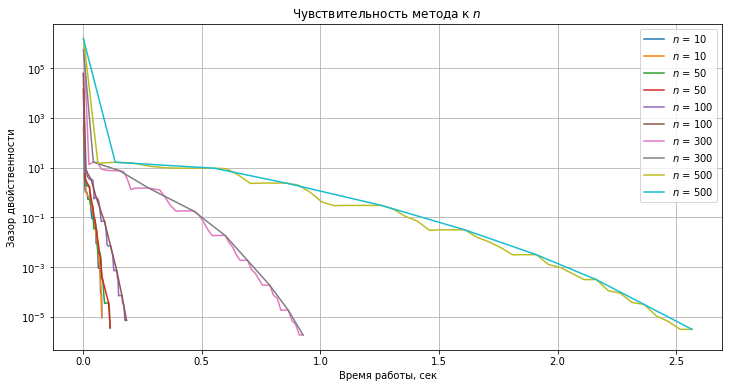

In [7]:
figure(figsize=(12, 6))
yscale('log')
title('Чувствительность метода к $n$ ')
xlabel('Номер итерации')
ylabel('Зазор двойственности')
grid(True)

for history, n in zip(histories, ns):
    plot([i for i in range(0, len(history['duality_gap_inner']))], history['duality_gap_inner'], \
         label='$n$ = %s'%n) 
legend()
savefig("n_dependancy_iterations.png", dpi=100)
show()



figure(figsize=(12, 6))
yscale('log')
title('Чувствительность метода к $n$ ')
xlabel('Время работы, сек')
ylabel('Зазор двойственности')
grid(True)
for history, n in zip(histories, ns):
    plot(history['time_inner'], history['duality_gap_inner'], label='$n$ = %s'%n)
    plot(history['time'], history['duality_gap'], label='$n$ = %s'%n) 
legend()
savefig("n_dependancy_time_comb.png", dpi=100)
show()


### m

In [8]:
np.random.seed(42)
ms = [10, 100, 1000, 10000, 100000]
n = 200
histories = []

for m in ms:
    dataX_rand = np.random.rand(m, n)
    dataY_rand = np.random.rand(m)
    
    x_0_rand = np.ones(dataX_rand.shape[1]) / 2
    u_0_rand = np.ones(dataX_rand.shape[1])
    
    (x_star, u_star), msg, history = optimization.barrier_method_lasso(dataX_rand, dataY_rand, 1, x_0_rand, u_0_rand,
                                                                       lasso_duality_gap=oracles.lasso_duality_gap,
                                                                       trace=True)
    histories.append(history)

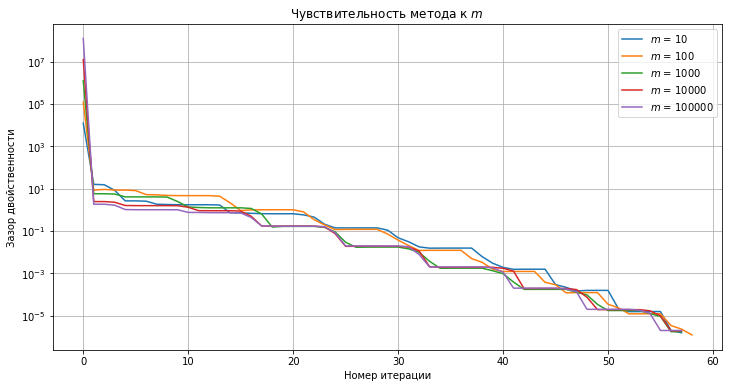

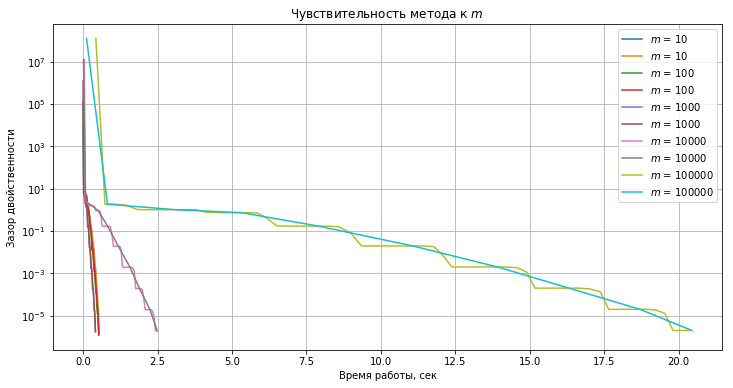

In [9]:
figure(figsize=(12, 6))
yscale('log')
title('Чувствительность метода к $m$ ')
xlabel('Номер итерации')
ylabel('Зазор двойственности')
grid(True)

for history, m in zip(histories, ms):
    plot([i for i in range(0, len(history['duality_gap_inner']))], history['duality_gap_inner'], \
         label='$m$ = %s'%m) 
legend()
savefig("m_dependancy_iterations.png", dpi=100)
show()



figure(figsize=(12, 6))
yscale('log')
title('Чувствительность метода к $m$ ')
xlabel('Время работы, сек')
ylabel('Зазор двойственности')
grid(True)
for history, m in zip(histories, ms):
    plot(history['time_inner'], history['duality_gap_inner'], label='$m$ = %s'%m)
    plot(history['time'], history['duality_gap'], label='$m$ = %s'%m) 
legend()
savefig("m_dependancy_time_comb.png", dpi=100)
show()


### $\lambda$

In [10]:
regcoefs = [0.01, 0.1, 1, 5, 10, 100] 
histories = []
for lamb in regcoefs:
    (x_star, u_star), msg, history = optimization.barrier_method_lasso(dataX, dataY, lamb, x_0, u_0,
                                                                       lasso_duality_gap=oracles.lasso_duality_gap,
                                                                       trace=True)
    histories.append(history)

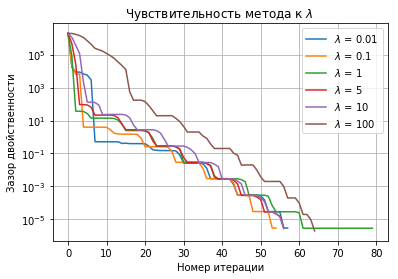

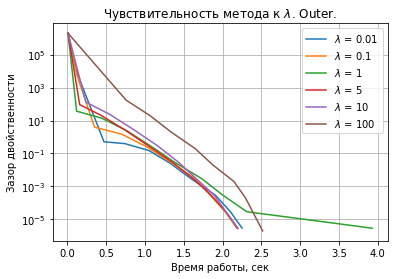

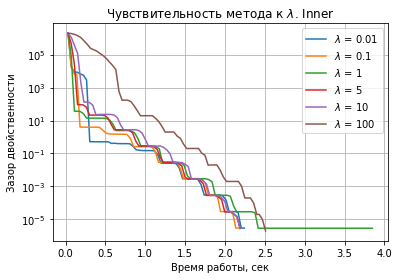

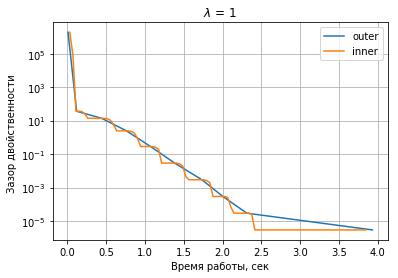

In [11]:
yscale('log')
title('Чувствительность метода к $\lambda$ ')
xlabel('Номер итерации')
ylabel('Зазор двойственности')
grid(True)

for history, lamb in zip(histories, regcoefs):
    plot([i for i in range(0, len(history['duality_gap_inner']))], history['duality_gap_inner'], \
         label='$\lambda$ = %s'%lamb) 
legend()
savefig("lamb_dependancy_iterations.png", dpi=100)
show()


yscale('log')
title('Чувствительность метода к $\lambda$. Outer.')
xlabel('Время работы, сек')
ylabel('Зазор двойственности')
grid(True)
for history, lamb in zip(histories, regcoefs):
    plot(history['time'], history['duality_gap'], label='$\lambda$ = %s'%lamb) 
legend()
savefig("lamb_dependancy_time_outer.png", dpi=100)
show()



yscale('log')
title('Чувствительность метода к $\lambda$. Inner')
xlabel('Время работы, сек')
ylabel('Зазор двойственности')
grid(True)
for history, lamb in zip(histories, regcoefs):
    plot(history['time_inner'], history['duality_gap_inner'], label='$\lambda$ = %s'%lamb) 
legend()
savefig("lamb_dependancy_time_inner.png", dpi=100)
show()



yscale('log')
title('$\lambda$ = %s'%regcoefs[2])
xlabel('Время работы, сек')
ylabel('Зазор двойственности ')
grid(True)
plot(histories[2]['time'], histories[2]['duality_gap'], label='outer') 
plot(histories[2]['time_inner'], histories[2]['duality_gap_inner'], label='inner') 
legend()
savefig("lamb_dependancy_lamb.png", dpi=100)
show()